# Pro Kabaddi League (PKL) Analysis

### Introduction

Pro Kabaddi League or abbreviated to PKL is a men's professional Kabaddi league of India. It was launched in 2014 and is broadcast on Star Sports.

The league's inception was influenced by the popularity of the Kabaddi tournament at the 2006 Asian Games. The format of the competition was influenced by the Indian Premier League. 

### Format

The Pro Kabaddi League's rules are similar to that of the indoor team version of Kabaddi, but with additional rules to encourage more scoring. Kabaddi is a contact team sport, played between two teams of seven players.

The objective of the game is for a single player on offence, referred to as a "raider", to run into the opposing team's half of a court, touch out as many of their defenders as possible, and return to their own half of the court, all without being tackled by the defenders, and in a single breath. Points are scored for each player tagged by the raider, while the opposing team earns a point for stopping the raider. Players are taken out of the game if they are touched or tackled, but are brought back in for each point scored by their team from a tags or tackle.
Playing two "empty" raids in a row will trigger a "Do or Die", where the raider must score a point or they will be declared out.
When a defensive side has three or fewer players remaining, tackles scored are termed as "Super Tackle", which is worth two points instead of one

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_html('https://en.wikipedia.org/wiki/Pro_Kabaddi_League#References')

In [3]:
df_teams = df[3]
df_teams.rename(columns={'Stadium[38]': 'Stadium'}, inplace=True)
df_teams

,Team,City/State,Stadium,Capacity
0,Bengal Warriors,"Kolkata, West Bengal",Netaji Indoor Stadium,12000
1,Bengaluru Bulls,"Bengaluru, Karnataka",Kanteerava Indoor Stadium,4200
2,Dabang Delhi KC,Delhi,Thyagaraj Sports Complex,4494
3,Gujarat Giants,"Ahmedabad, Gujarat",The Arena Indoor Stadium,4000
4,Haryana Steelers,"Sonipat, Haryana",Motilal Nehru School of Sports,2000
5,Jaipur Pink Panthers,"Jaipur, Rajasthan",Sawai Mansingh Indoor Stadium,2000
6,Patna Pirates,"Patna, Bihar",Patliputra Sports Complex,20000
7,Puneri Paltan,"Pune, Maharashtra",Shree Shiv Chhatrapati Sports Complex,4200
8,Tamil Thalaivas,"Chennai, Tamilnadu",Jawaharlal Nehru Stadium,5000
9,Telugu Titans,"Hyderabad/Vizag, Telangana",Gachibowli Indoor Stadium,5000


## Which Stadium has the highest seating Capacity

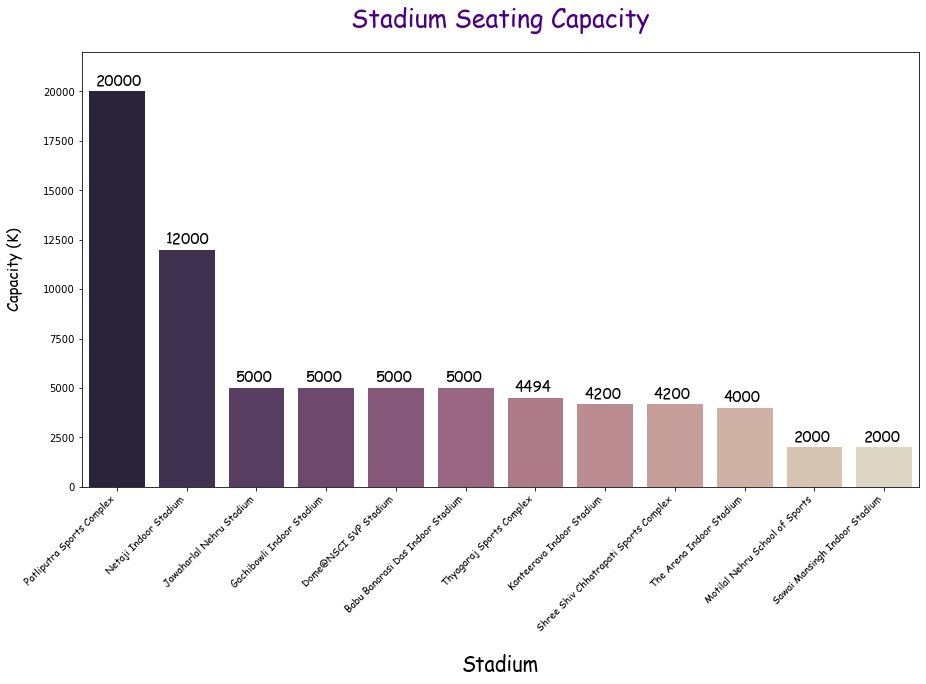

In [4]:
df_teams.sort_values(by='Capacity', ascending=False, inplace=True)
plt.figure(figsize=(15,8))
sns.barplot(x=df_teams['Stadium'], y=df_teams['Capacity'], palette='ch:s=-.2,r=.6_r') #_r to revrese the color order
plt.xticks(rotation=45, ha='right', family='cursive')
plt.title("Stadium Seating Capacity", fontsize=25, pad=25, family='cursive', color='indigo')
plt.xlabel("Stadium", fontsize=20, labelpad=20,family='cursive')
plt.ylabel("Capacity (K)", fontsize=15, labelpad=20,family='cursive')
plt.ylim(0,22000)

df_ann = df_teams['Capacity']

for x, y in enumerate(df_ann):
    plt.annotate(y, (x-.3,y+300),family='cursive', fontsize=15)

## How was the Best raider and Best Defender across Season

In [5]:
df[4].rename(columns={'Season': 'Season', 'Winner':'Winner', 'Result':'Result', 'Final venue': 'Venue'
                     , 'No. of teams': 'No of Teams', 'Best raider (Most raid points)': 'Best Raider', 'Best defender (Most tackle points)': 'Best Defender'}, inplace = True)
df[4].loc[8] = ['Season', 'Winner', 'Result','Runner Up', 'Venue', 'No of Teams', 'Best Raider', 'Best Defender', 'Most Total Points']

df[4].columns = df[4].iloc[8]
df[4].rename(index={8:'Sl No'}, inplace=True)
df[4].columns = df[4].iloc[8]
df[4].drop(['Sl No'],axis=0, inplace=True)
df_pkl_results = df[4]
df_pkl_results.loc[7].replace({'2021–22':'2021'}, inplace=True)

for i in range(len(df_pkl_results)):
    df_pkl_results['Result'][i]=df_pkl_results['Result'][i][:5]
    
col = ['Best Raider', 'Best Defender', 'Most Total Points']
for i in col:
    df_pkl_results[i] = df_pkl_results[i].str.replace('[', '')
    df_pkl_results[i] = df_pkl_results[i].str.replace(']', '')
    df_pkl_results[i] = df_pkl_results[i].str.replace('\d+', '')# To remove number from column
    df_pkl_results[i] = df_pkl_results[i].str.rstrip()
    
df_pkl_results[['Winners Points', 'Loosers Points']] = df_pkl_results['Result'].str.split('–', expand=True)

df_pkl_results = df_pkl_results.astype({'Winners Points': int, "Loosers Points":int, 'No of Teams':int})
df_pkl_results["Won by"] = df_pkl_results['Winners Points'] - df_pkl_results['Loosers Points']

print("Best Players across Season")
df_pkl_results[['Season', 'Best Raider', 'Best Defender', 'Most Total Points']]

Best Players across Season


C:\Users\Premk\AppData\Local\Temp/ipykernel_4652/1205858404.py:17: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_pkl_results[i] = df_pkl_results[i].str.replace('[', '')
C:\Users\Premk\AppData\Local\Temp/ipykernel_4652/1205858404.py:18: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_pkl_results[i] = df_pkl_results[i].str.replace(']', '')
C:\Users\Premk\AppData\Local\Temp/ipykernel_4652/1205858404.py:19: FutureWarning: The default value of regex will change from True to False in a future version.
  df_pkl_results[i] = df_pkl_results[i].str.replace('\d+', '')# To remove number from column


Sl No,Season,Best Raider,Best Defender,Most Total Points
0,2014,Anup Kumar,Manjeet Chhillar,Anup Kumar
1,2015,Kashiling Adake,Ravinder Pahal,Kashiling Adake
2,2016,Pardeep Narwal,Manjeet Chhillar,Pardeep Narwal
3,2016,Rahul Chaudhari,Fazel Atrachali,Rahul Chaudhari
4,2017,Pardeep Narwal,Surender Nada,Pardeep Narwal
5,2018,Pawan Sehrawat,Nitesh Kumar,Pawan Sehrawat
6,2019,Pawan Sehrawat,Fazel Atrachali,Pawan Sehrawat
7,2021,Pawan Sehrawat,Mohammadreza Chiyaneh,Pawan Sehrawat


## By how many points did the finalist won.

In [6]:
print("Win Margin",'\n', '-'*100)
for i in range(len(df_pkl_results)):
    print("In", df_pkl_results['Season'][i], df_pkl_results['Winner'][i],"won by", df_pkl_results['Winners Points'][i], "points over" ,df_pkl_results['Runner Up'][i])

Win Margin 
 ----------------------------------------------------------------------------------------------------
In 2014 Jaipur Pink Panthers won by 35 points over U Mumba
In 2015 U Mumba won by 36 points over Bengaluru Bulls
In 2016 Patna Pirates won by 31 points over U Mumba
In 2016 Patna Pirates won by 37 points over Jaipur Pink Panthers
In 2017 Patna Pirates won by 55 points over Gujarat Fortune Giants
In 2018 Bengaluru Bulls won by 38 points over Gujarat Fortune Giants
In 2019 Bengal Warriors won by 39 points over Dabang Delhi
In 2021 Dabang Delhi won by 37 points over Patna Pirates


### To Replace NaN and null values

``` python
df.fillna(1)
or
df.replace(np.nan,1)
```

## Number of time a single team being in Finals

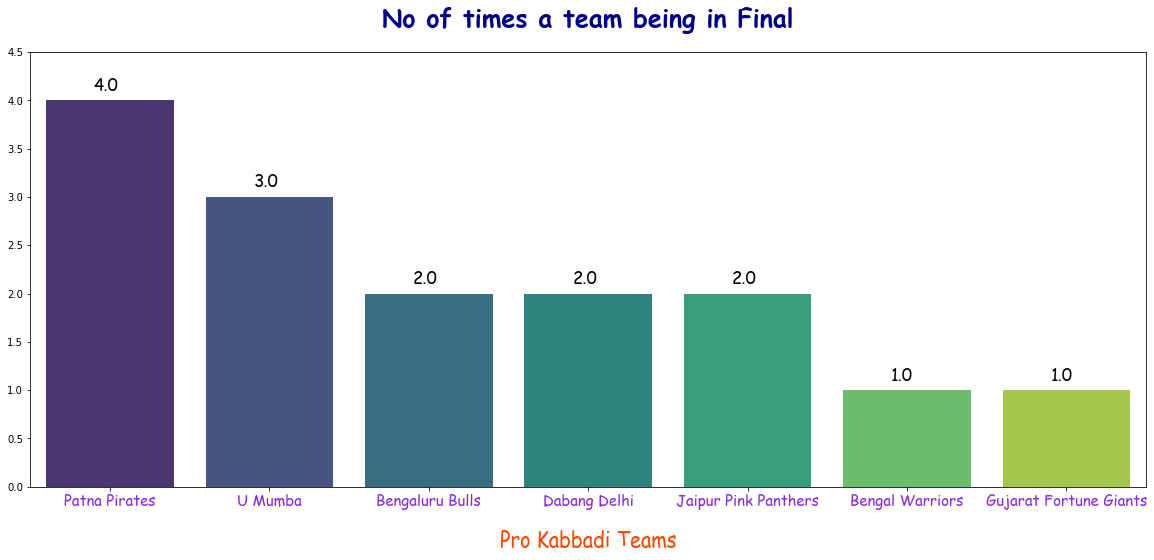

In [7]:
df_finalist = (df_pkl_results['Winner'].value_counts()+df_pkl_results['Runner Up'].value_counts()).sort_values(ascending=False).replace(np.nan, 1)

plt.figure(figsize=(20,8))
sns.barplot(x=df_finalist.index, y=df_finalist.values, palette='viridis')
plt.xlabel("Pro Kabbadi Teams", fontsize=20, labelpad=20, family='cursive', color='orangered')
plt.xticks(fontsize=15, family='cursive', color='blueviolet')
plt.ylim(0,4.5)
plt.title("No of times a team being in Final", fontsize=25, pad=25, color='darkblue', weight=25, family='cursive', fontweight="bold")
for x,y in enumerate(df_finalist):
    plt.annotate(y, (x-0.1,y+.1), fontsize=17, family='cursive')
plt.show()

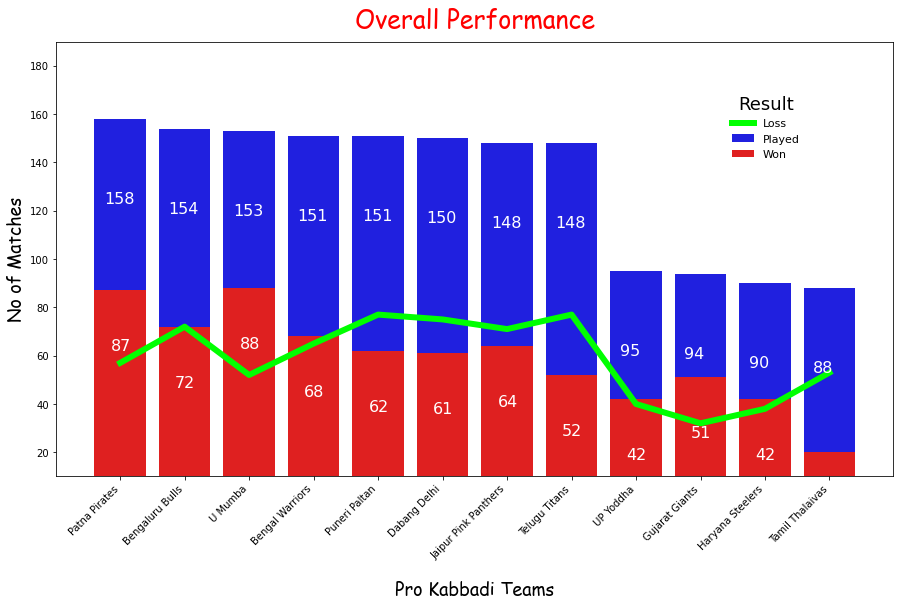

In [8]:
df_overall = df[5]
df_overall.rename(columns={'Team[44]':"Team"}, inplace=True)
df_overall.drop(12, axis=0, inplace=True)

df_overall['Loss%'] = df_overall['Loss%'].str.split('%', expand=True).drop(1, axis=1)
df_overall['Win%'] = df_overall['Win%'].str.split('%', expand=True).drop(1, axis=1)
df_overall['Draw%'] = df_overall['Draw%'].str.split('%', expand=True).drop(1, axis=1)

# Changing Data Types
df_overall[['Win%', 'Loss%']]=df_overall[['Win%', 'Loss%']].astype(float)

df_overall.loc[:,'Played':'Draw']=df_overall.loc[:,'Played':'Draw'].astype(int)

#Plottinh
df_overall.sort_values(by='Played',ascending=False, inplace=True)
plt.figure(figsize=(15,8))
sns.barplot(x=df_overall['Team'], y=df_overall['Played'], label="Played", color='blue')
sns.barplot(x=df_overall['Team'], y=df_overall['Won'], label="Won", color='red')
sns.lineplot(x=df_overall['Team'], y=df_overall['Loss'], label="Loss", linewidth=6, color='lime')
plt.title("Overall Performance", family='cursive', fontsize=25, pad=15, color='red')
plt.xlabel('Pro Kabbadi Teams', fontsize=18, family='cursive', labelpad=20)
plt.ylabel('No of Matches', fontsize=18, family='cursive')
plt.xticks(rotation=45, ha='right')
plt.legend(frameon=False, fontsize=11,title= 'Result', title_fontsize=18, bbox_to_anchor=(0.9,0.9))# Frameon is outside box of legend
plt.ylim(10,190)
for x,y in enumerate(df_overall['Played']):
    plt.annotate(y, (x-0.25,y-35), fontsize=16, color='white')
for x,y in enumerate(df_overall['Won']):
    plt.annotate(y, (x-0.15,y-25), fontsize=16, color='white')
plt.show()

## Maximum Trophies won by which Team?

In [9]:
print('No of Trophies by a team','\n','-'*33)
df_overall['Trophy']=df_overall['Trophy'].astype(int)
print(df_overall[['Team','Trophy']].loc[df_overall['Trophy']>0].sort_values(by='Trophy',ascending=False))

No of Trophies by a team 
 ---------------------------------
                    Team  Trophy
6          Patna Pirates       3
1        Bengaluru Bulls       1
10               U Mumba       1
0        Bengal Warriors       1
2           Dabang Delhi       1
5   Jaipur Pink Panthers       1


## Total and Average points by a team.

### Total Points

In [16]:
df_total_points=df[7]
df_total_points.drop(['Unnamed: 4', 'Unnamed: 5'], axis=1, inplace=True)
df_total_points.drop(12, axis=0, inplace=True)
df_total_points.set_index('Rank',inplace=True)
df_total_points = df_total_points.astype({'Matches' : int, 'Total Points': int}).sort_values(by='Total Points', ascending=True)

### Average Points

In [17]:
df_average_points=df[9]
df_average_points.drop(['Unnamed: 4', 'Unnamed: 5'], axis=1, inplace=True)
df_average_points.drop(12, axis=0, inplace=True)
df_average_points.set_index('Rank',inplace=True)
df_average_points = df_average_points.astype({'Matches' : int, 'Average Points': float}).sort_values(by='Average Points', ascending=True)

## Ploting

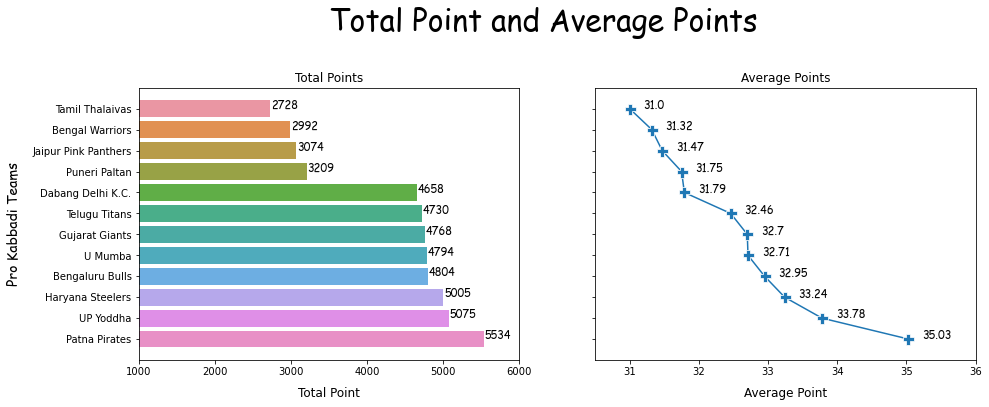

In [20]:
fig, axes = plt.subplots(1,2, figsize=(15,5), sharey=True)
fig.suptitle("Total Point and Average Points", x=0.5, y=1.105,fontsize=30, family='cursive')
axes[0].set_title("Total Points")
axes[1].set_title("Average Points")
sns.barplot(ax=axes[0],y=df_total_points['Team'], x=df_total_points['Total Points'], orientation='horizontal')
sns.lineplot(ax=axes[1],y=df_average_points['Team'], x=df_average_points['Average Points'], marker='P', markersize=11)
axes[0].set_xlabel("Total Point", fontsize=12, labelpad=10)
axes[0].set_ylabel("Pro Kabbadi Teams", fontsize=14, labelpad=10, family='cursive')
axes[1].set_xlabel("Average Point", fontsize=12, labelpad=10)
axes[0].set_xlim(1000,6000)
axes[1].set_xlim(30.5,36)
for x,y in enumerate(df_average_points['Average Points']):
    axes[1].annotate(y,(y+.2,x), family='cursive', fontsize=11)
for x,y in enumerate(df_total_points['Total Points']):
    axes[0].annotate(y,(y+10,x), family='cursive', fontsize=11)
plt.show()

# Ploting all graphs related to teams

In [7]:
df_succesful_raids = df[10]
df_raid_points = df[11]
df_avg_raid_points = df[12]
df_succesful_tackles = df[13]
df_tackle_points = df[14]
df_avg_tackle_points = df[15]
df_super_raids = df[16]
df_super_tackles = df[17]
df_do_or_die = df[18]

tab=[df_succesful_raids,df_raid_points, df_avg_raid_points, df_succesful_tackles,df_tackle_points, df_avg_tackle_points,df_super_raids,df_super_tackles,df_do_or_die]
col=['Raid Points', 'Raid Points','Average Raid Points', 'Tackle Points', 'Tackle Points', 'Avg Tackle Points', 'Average Points','Super Tackles','Points']

for i,j in zip(range(9),range(9)):
    tab[i].drop(['Unnamed: 4', 'Unnamed: 5'], axis=1, inplace=True)
    tab[i].drop(12, axis=0, inplace=True)
    tab[i].set_index('Rank',inplace=True)
    tab[i] = tab[i].astype({'Matches' : int, col[j]: float}).sort_values(by=col[j], ascending=False)

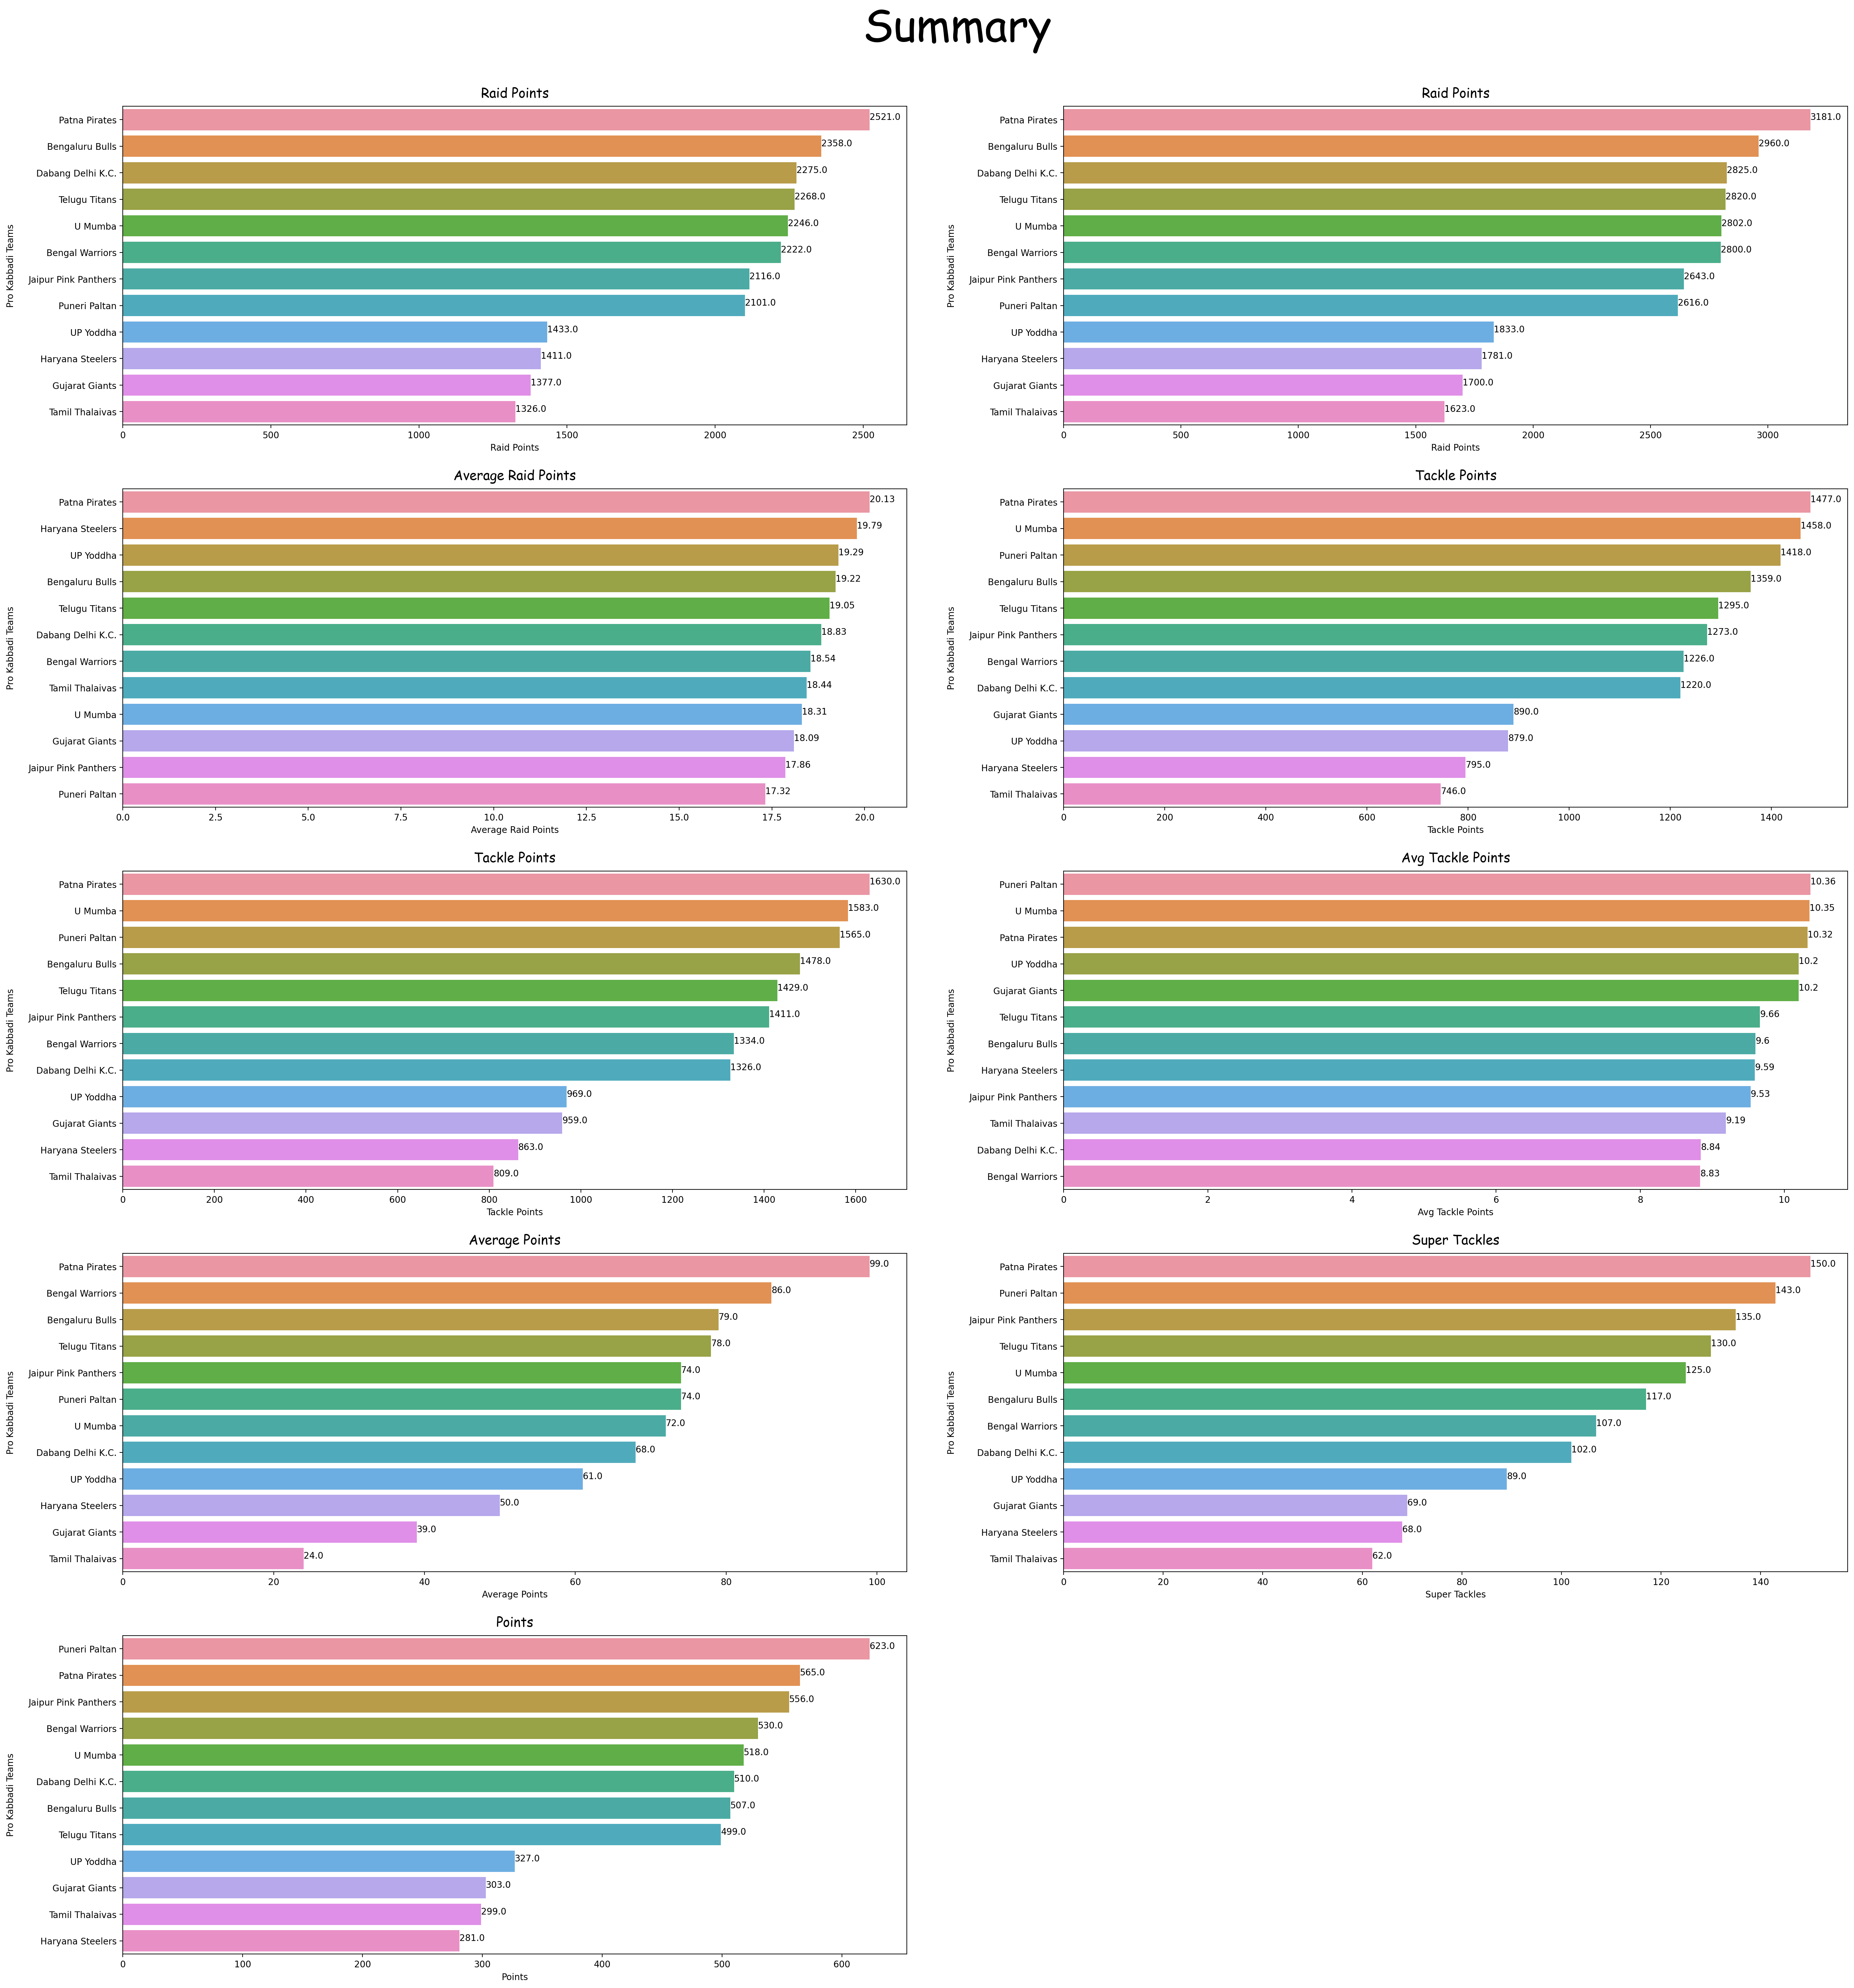

In [88]:
plt.figure(figsize=(35,35), dpi=200)
plt.suptitle("Summary", fontsize=50, family='cursive', x=.5,y=0.925)
for k in range(9):
    plots=k
    plt.subplot(5,2,plots+1)
    sns.barplot(y=tab[k]['Team'], x=tab[k][col[k]], orientation='horizontal')
    plt.title(col[k], fontsize=15, family='cursive', pad=10)
    plt.ylabel("Pro Kabbadi Teams", labelpad=15)
    for x,y in enumerate(tab[k][col[k]]):
        plt.annotate(y,(y,x))

plt.subplots_adjust(bottom=.05)
plt.savefig("Summary.jpg")

# Players Analysis

## Raider Analysis

In [152]:
df_most_raid_points = df[22]
df_avg_raid_points = df[24]
df_super_raids = df[25]
df_do_or_die_points = df[26]
df_super_10s = df[27]

df_most_raid_points.drop(10, axis=0, inplace=True)
df_avg_raid_points=df_avg_raid_points.drop(10, axis=0).drop('Unnamed: 5', axis=1)
df_super_raids=df_super_raids.drop(10, axis=0).drop('Unnamed: 5', axis=1)
df_do_or_die_points=df_do_or_die_points.drop(11, axis=0).drop('Unnamed: 5', axis=1)
df_super_10s.drop(10,axis=0, inplace=True)
df_most_raid_points.rename(columns={'Player': 'Player Name'}, inplace=True)

dfsd=[df_most_raid_points,df_avg_raid_points,df_super_raids,df_do_or_die_points,df_super_10s]

for i in range(len(dfsd)):
    dfsd[i].set_index('Rank', inplace=True)
    
df_int= [df_most_raid_points,df_super_raids,df_do_or_die_points,df_super_10s]
for_int=['Raid Points','Super Raids','Points','Super 10s' ]

for i,j in zip(range(len(df_int)),range(len(df_int))):
    df_int[i][for_int[j]]=df_int[i][for_int[j]].astype(int)
    
df_float=[df_most_raid_points,df_avg_raid_points]
for_float=['Raid points/match','Average Raid Points' ]

for i,j in zip(range(len(df_float)),range(len(df_float))):
    df_float[i][for_float[j]]=df_float[i][for_float[j]].astype(float)

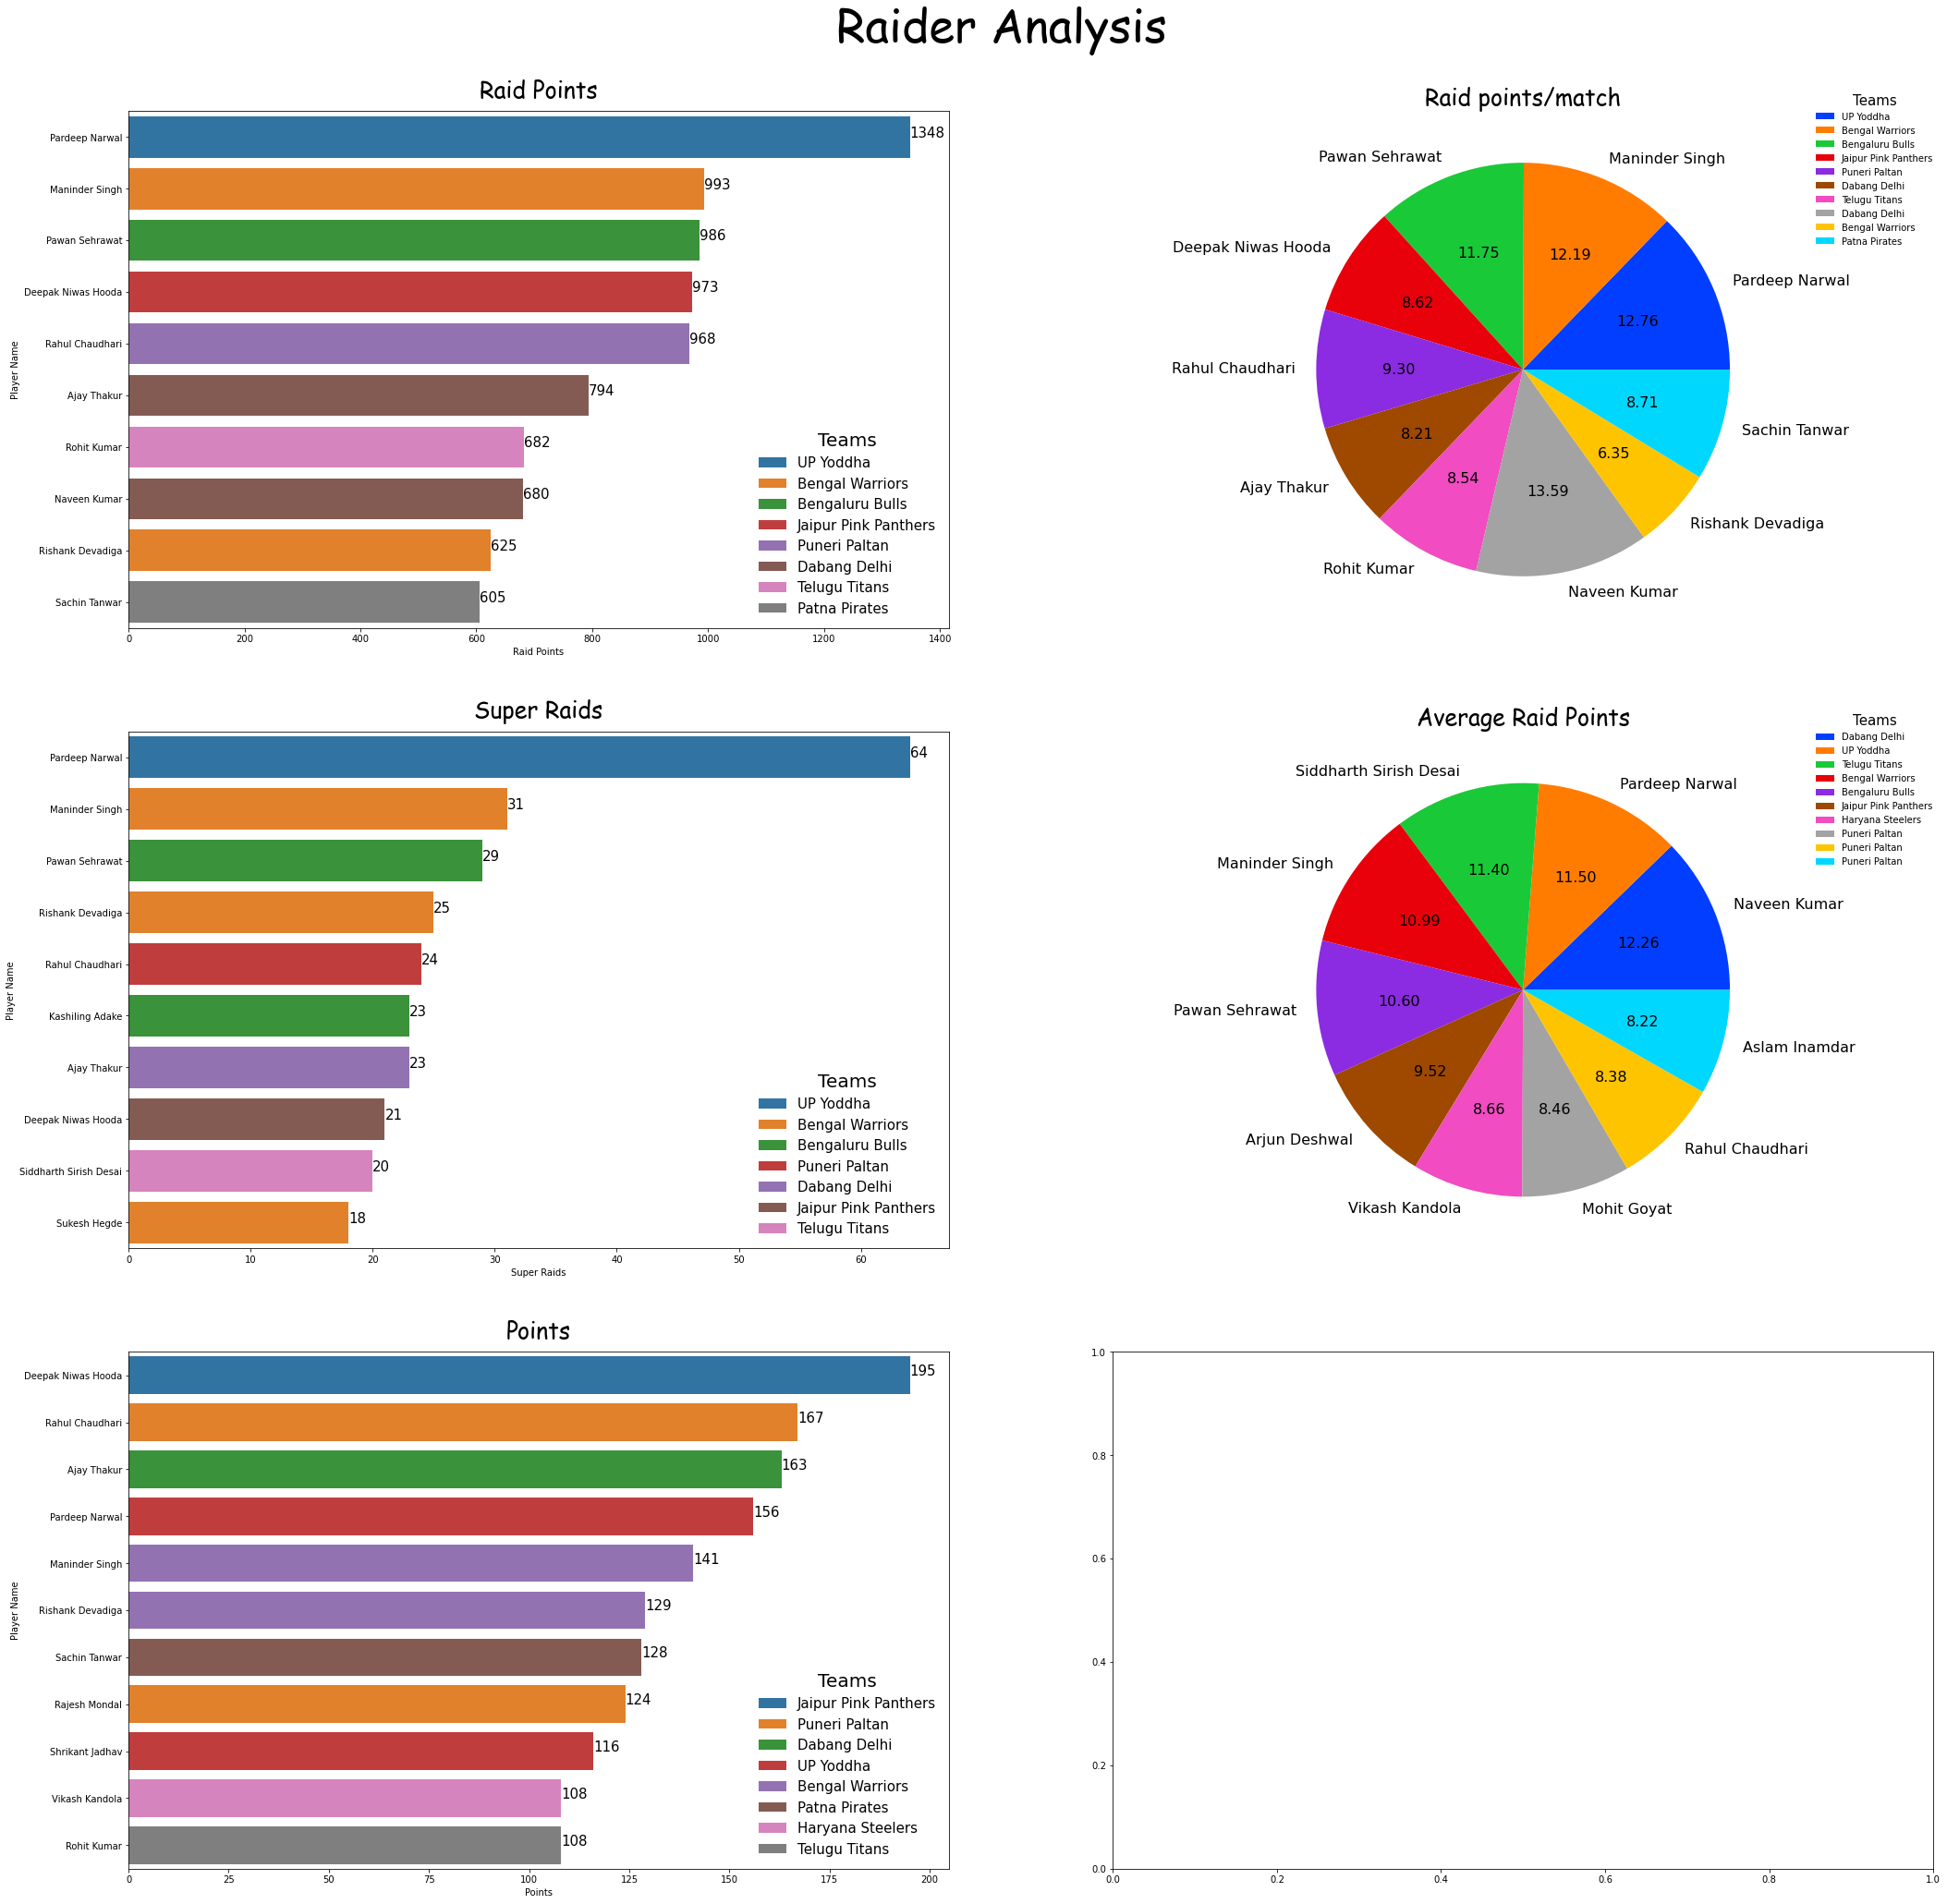

In [173]:
plt.figure(figsize=(35,35))
plt.suptitle("Raider Analysis", fontsize=50, x=0.5, y=.925, family='cursive')
plots=0
for i in range(len(df_int)):
    try:
        plt.subplot(3,2,plots+1)
        sns.barplot(x=df_int[i][for_int[i]], y=df_int[i]['Player Name'], hue=df_int[i]['Current Team'], dodge=False)
        plt.title(for_int[i], fontsize=25, family='cursive', pad=15)
        plt.legend(loc='lower right',fontsize=15, title='Teams', title_fontsize=20, frameon = False)
        plots=plots+1
        for x, y in enumerate(df_int[i][for_int[i]]):
            plt.annotate(y,(y,x), fontsize=15)
    except Exception:
        print("")
    
    try:
        plt.subplot(3,2,plots+1)
        plots=plots+1
        colors=sns.color_palette('bright')
        labels=df_float[i]['Player Name']
        data=df_float[i][for_float[i]]
        plt.pie(data, labels=labels, colors=colors,autopct = '%.2f', textprops={'fontsize':16})
        plt.legend(df_float[i]['Current Team'],bbox_to_anchor=(1.05,1.05), loc='upper left',title='Teams', title_fontsize=15, frameon = False )
        plt.title(for_float[i], fontsize=25, family='cursive')
    except Exception:
        print('')
        

## Defenders Analysis

In [107]:
df_most_tackle_points=df[28]
df_avg_tackle_points = df[30]
df_most_super_tackles =df[31]
df_most_high5s =df[32]

df_most_tackle_points = df_most_tackle_points.drop(10, axis=0).astype({'Matches': int, 'Tackle Points': int, 'Points/match':float})
df_avg_tackle_points = df_avg_tackle_points.drop(10, axis=0).drop('Unnamed: 5', axis=1).astype({'Matches': int, 'Average Tackle Points': float})
df_most_super_tackles = df_most_super_tackles.drop(11, axis=0).drop('Unnamed: 5', axis=1).astype({'Matches': int, 'Super Tackles': int})
df_most_high5s = df_most_high5s.drop(11, axis=0).astype({'Match Played': int, 'High 5s': int, 'Match/high 5s':float})


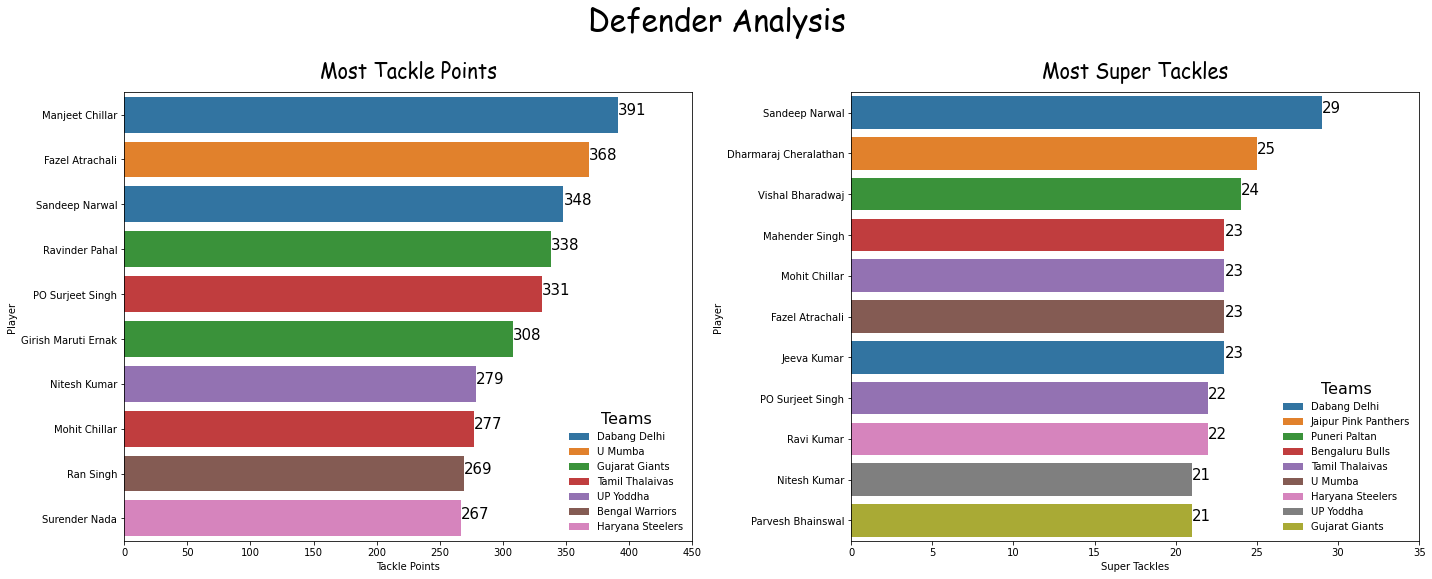

In [176]:
plt.figure(figsize=(20,8))
title=["Most Tackle Points","Most Super Tackles"]
points=['Tackle Points','Super Tackles']
df_s = [df_most_tackle_points, df_most_super_tackles]
xlimm=[450,35]
plt.suptitle("Defender Analysis", fontsize=30, family='cursive', x=0.5, y=1)
for i in range(len(df_s)):
    plt.subplot(1,2,i+1)
    sns.barplot(x= df_s[i][points[i]], y=df_s[i]['Player'], hue=df_s[i]['Current Team'], dodge=False)
    plt.xlim(0,xlimm[i])
    plt.title(title[i], fontsize=20, family='cursive',pad=15)
    plt.legend(frameon=False, title="Teams", title_fontsize=16)
    for x,y in enumerate(df_s[i][points[i]]):
        plt.annotate(y, (y,x), fontsize=15)

plt.tight_layout()

In [191]:
high5_grp = df_most_high5s.groupby('Position').sum().sort_values(by='High 5s', ascending= False)
high5_grp

,Match Played,High 5s,Match/high 5s
Position,,,
"Defender, left corner",342,64,16.06
Defender,256,54,14.25
All Rounder,281,42,14.04
"Defender, right cover",114,29,3.93
"Defender, right",120,23,5.21
"Defender, right corner",109,18,6.05


Text(0, 0.5, 'No of High 5s')

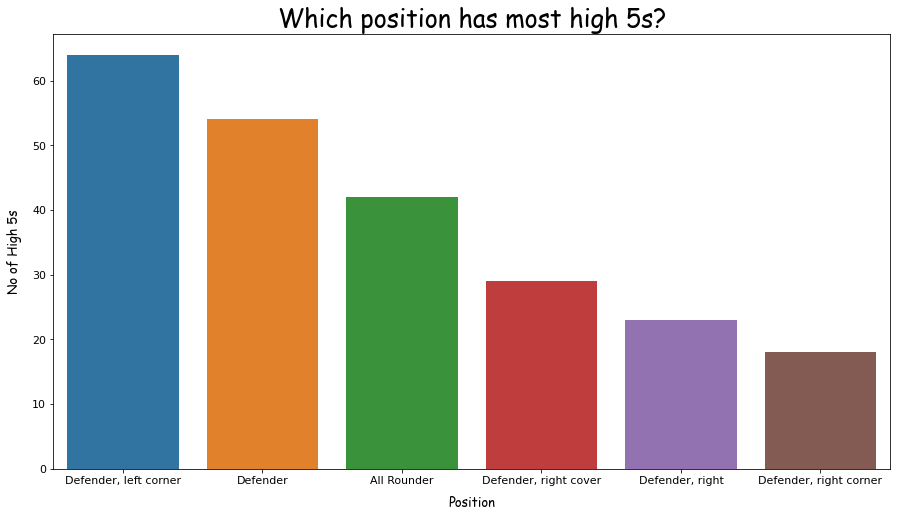

In [202]:
plt.figure(figsize=(15,8))
sns.barplot(x=high5_grp.index, y=high5_grp['High 5s'])
plt.title("Which position has most high 5s?", fontsize=25, family='cursive')
plt.tick_params(axis='both', labelsize=11)
plt.xlabel("Position", fontsize=13, family='cursive', labelpad=10)
plt.ylabel("No of High 5s", fontsize=13, family='cursive', labelpad=10)

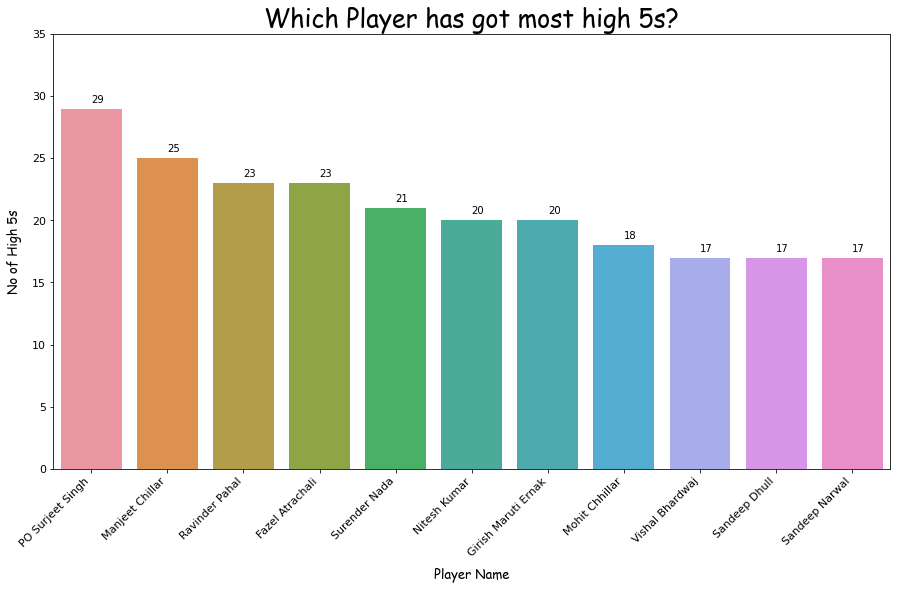

In [212]:
plt.figure(figsize=(15,8))
sns.barplot(x=df_most_high5s['Player Name'], y=df_most_high5s['High 5s'])
plt.title("Which Player has got most high 5s?", fontsize=25, family='cursive')
plt.tick_params(axis='both', labelsize=11)
plt.xlabel("Player Name", fontsize=13, family='cursive', labelpad=10)
plt.ylabel("No of High 5s", fontsize=13, family='cursive', labelpad=10)
plt.xticks(rotation=45, ha= 'right')
plt.ylim(0,35)
for x, y in enumerate(df_most_high5s['High 5s']):
    plt.annotate(y,(x,y+0.5))
plt.show()